In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ktm_House_Price.csv')

In [4]:
df.head()

,Unnamed: 0,District,VDC,Direction,Bedroom,Bathroom,Living,Parking_sqft,Road_size_ft,Land_sqft,Price
0,0,Kathmandu,other,East,3.0,6.0,3.0,85.0,13.0,1026.72,21500000.0
1,2,Kathmandu,other,South,5.0,5.0,1.0,85.0,20.0,1368.96,50000000.0
2,4,Kathmandu,other,South,5.0,2.0,1.0,22.0,13.0,342.24,15000000.0
3,6,Kathmandu,other,South,3.0,3.0,3.0,170.0,13.0,1026.72,25000000.0
4,8,Kathmandu,other,East,6.0,5.0,2.0,170.0,20.0,1711.20,47500000.0


In [5]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   District      890 non-null    object 
 1   VDC           890 non-null    object 
 2   Direction     890 non-null    object 
 3   Bedroom       890 non-null    float64
 4   Bathroom      890 non-null    float64
 5   Living        890 non-null    float64
 6   Parking_sqft  699 non-null    float64
 7   Road_size_ft  801 non-null    float64
 8   Land_sqft     890 non-null    float64
 9   Price         890 non-null    float64
dtypes: float64(7), object(3)
memory usage: 69.7+ KB


In [7]:
df.describe()

,Bedroom,Bathroom,Living,Parking_sqft,Road_size_ft,Land_sqft,Price
count,890.000000,890.000000,890.000000,699.000000,801.000000,8.900000e+02,8.900000e+02
mean,5.348315,3.737079,3.641573,126.394850,14.737828,9.942714e+03,3.971975e+07
std,2.681022,1.731231,3.883086,133.007718,4.322462,1.265986e+05,3.011081e+07
min,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000e+00,7.500000e+04
25%,4.000000,3.000000,1.000000,85.000000,13.000000,3.422400e+02,2.500000e+07
50%,5.000000,4.000000,2.000000,85.000000,13.000000,1.368960e+03,3.200000e+07
75%,6.000000,5.000000,4.000000,170.000000,16.000000,3.422400e+03,4.350000e+07
max,28.000000,20.000000,15.000000,850.000000,44.000000,3.504538e+06,3.910000e+08


# Checking Outliers

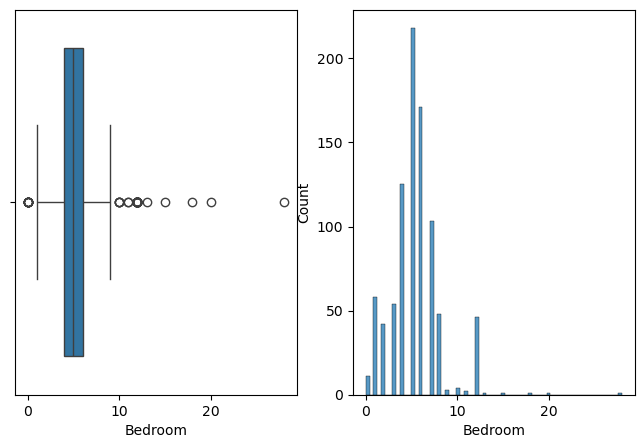

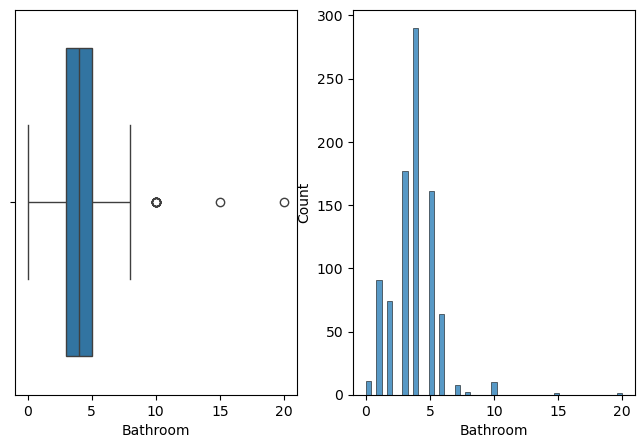

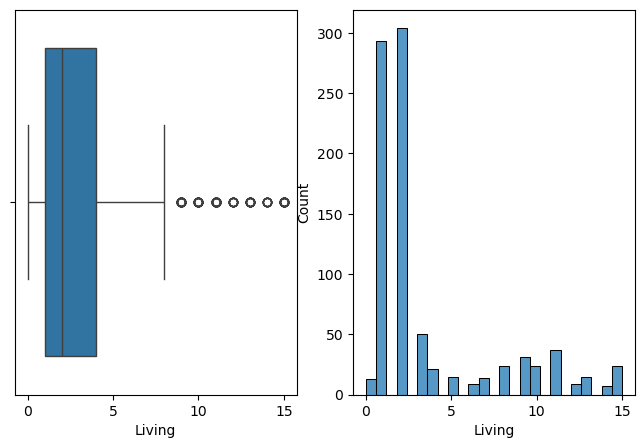

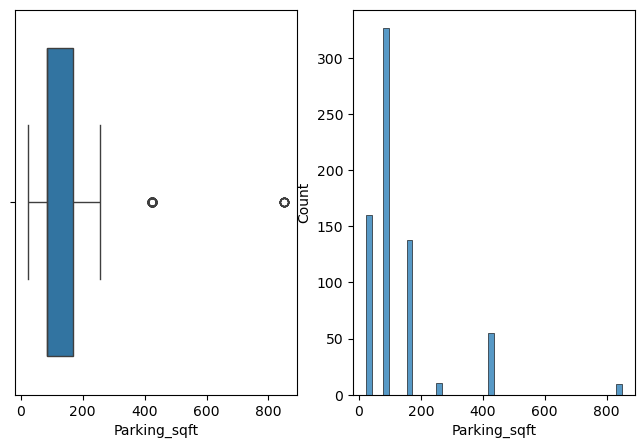

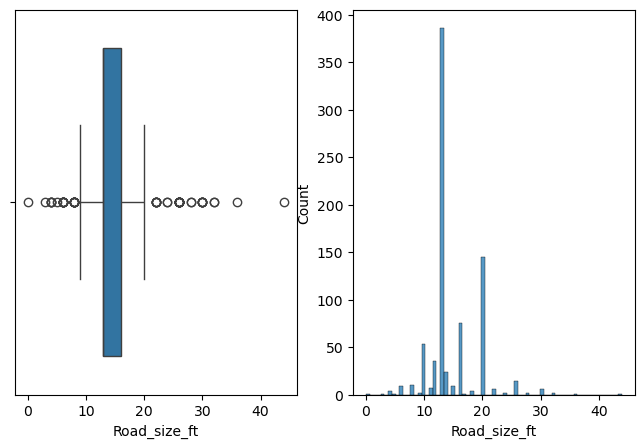

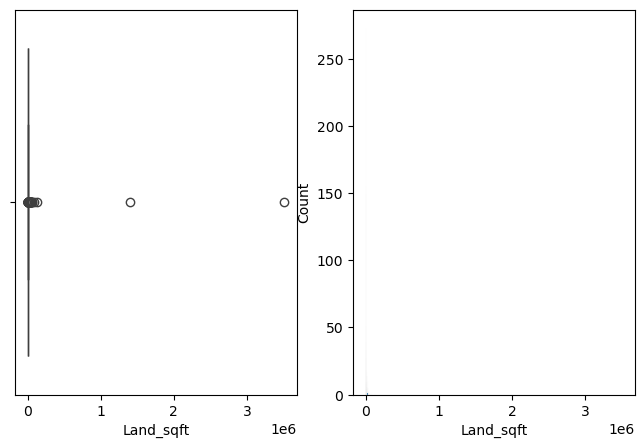

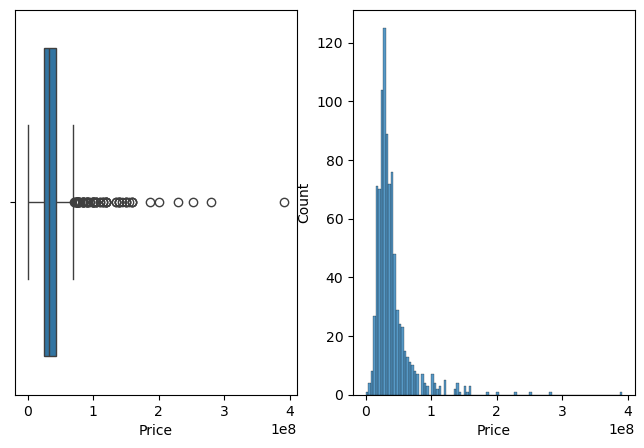

In [9]:
for i in df.select_dtypes(include='number').columns:
    plt.figure(figsize = (8,5))
    plt.subplot(1,2,1)
    sns.boxplot(data = df,x = i)
    plt.subplot(1,2,2)
    sns.histplot(data = df, x = i)
    plt.show()

# Task:
**Outlier in Bedroom, Bathroom, Living, Parking_sqft, Road_size_ft, Land_sqft, Price.**

# Handling Outliers

In [12]:
for i in df.select_dtypes(include = 'number').columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df[i] = np.where(df[i]>upper, upper, np.where(df[i]<lower, lower,df[i]))

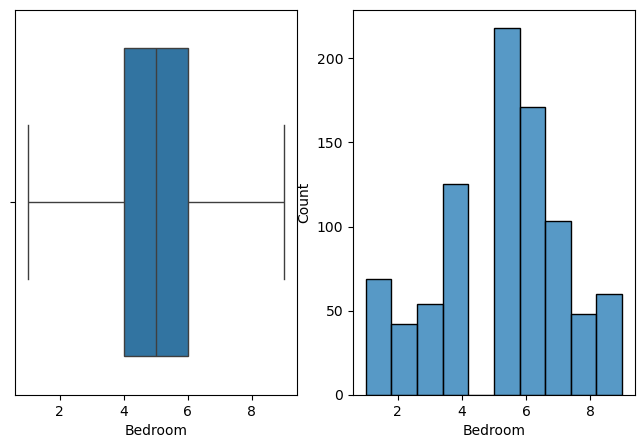

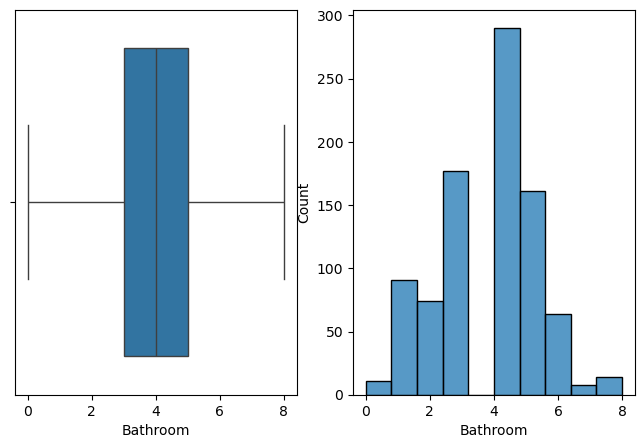

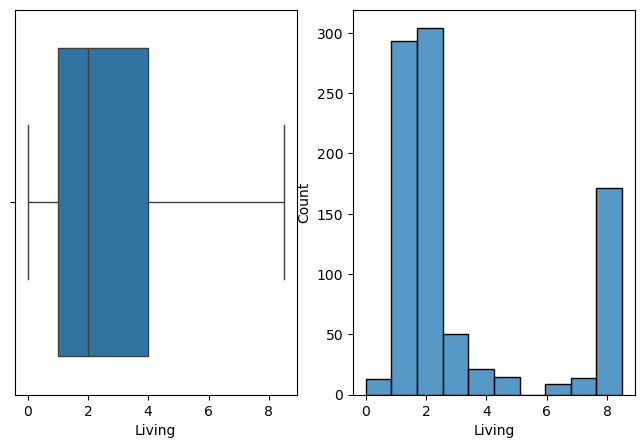

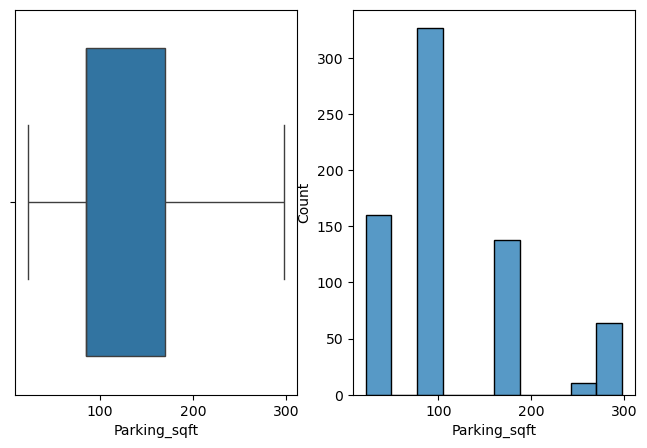

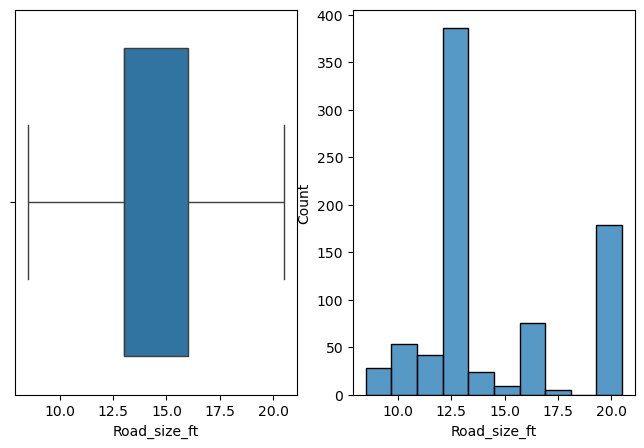

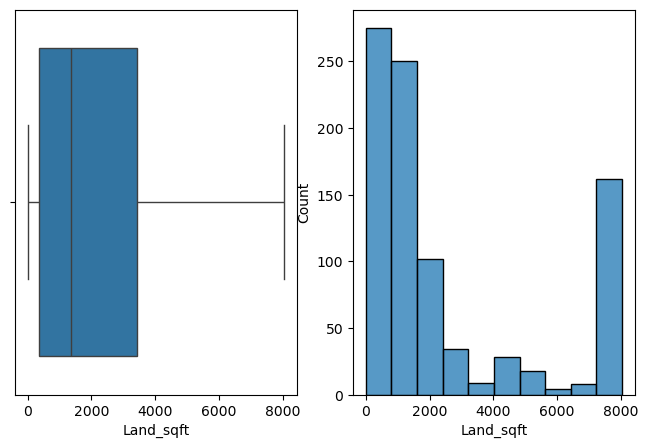

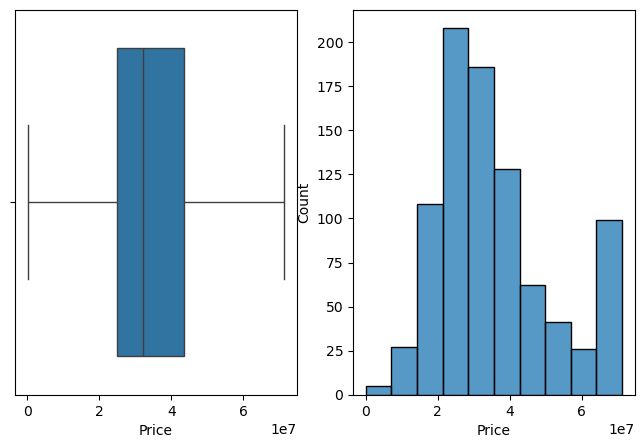

In [13]:
for i in df.select_dtypes(include='number').columns:
    plt.figure(figsize = (8,5))
    plt.subplot(1,2,1)
    sns.boxplot(data = df,x = i)
    plt.subplot(1,2,2)
    sns.histplot(data = df, x = i,bins=10)
    plt.show()

In [14]:
ct = df.corr(numeric_only = True)
ct

,Bedroom,Bathroom,Living,Parking_sqft,Road_size_ft,Land_sqft,Price
Bedroom,1.000000,0.684971,0.153338,0.174527,0.057009,0.009477,0.168397
Bathroom,0.684971,1.000000,0.066512,0.287257,0.108812,0.066628,0.296537
Living,0.153338,0.066512,1.000000,0.025734,-0.079926,0.059898,-0.052187
Parking_sqft,0.174527,0.287257,0.025734,1.000000,0.125853,0.011422,0.515708
Road_size_ft,0.057009,0.108812,-0.079926,0.125853,1.000000,0.031981,0.247632
Land_sqft,0.009477,0.066628,0.059898,0.011422,0.031981,1.000000,0.016062
Price,0.168397,0.296537,-0.052187,0.515708,0.247632,0.016062,1.000000


<Axes: >

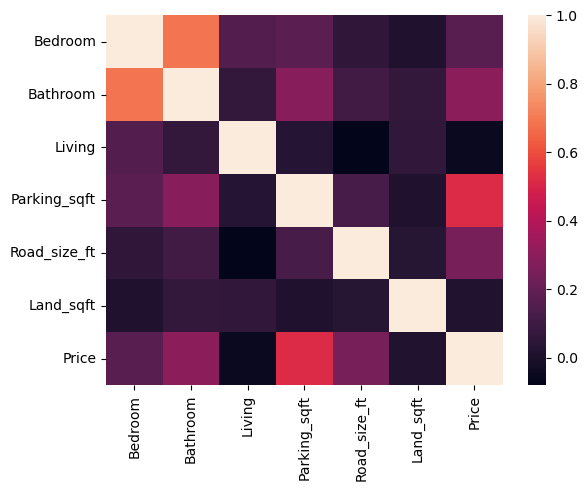

In [15]:
sns.heatmap(ct)

In [16]:
df.columns

Index(['District', 'VDC', 'Direction', 'Bedroom', 'Bathroom', 'Living',
       'Parking_sqft', 'Road_size_ft', 'Land_sqft', 'Price'],
      dtype='object')

In [17]:
df.describe()

,Bedroom,Bathroom,Living,Parking_sqft,Road_size_ft,Land_sqft,Price
count,890.000000,890.000000,890.000000,699.000000,801.000000,890.000000,8.900000e+02
mean,5.141573,3.693258,3.150000,109.248927,14.533084,2560.368236,3.603149e+07
std,2.062074,1.535943,2.807215,79.396638,3.369787,2869.236907,1.629233e+07
min,1.000000,0.000000,0.000000,22.000000,8.500000,0.000000,7.500000e+04
25%,4.000000,3.000000,1.000000,85.000000,13.000000,342.240000,2.500000e+07
50%,5.000000,4.000000,2.000000,85.000000,13.000000,1368.960000,3.200000e+07
75%,6.000000,5.000000,4.000000,170.000000,16.000000,3422.400000,4.350000e+07
max,9.000000,8.000000,8.500000,297.500000,20.500000,8042.640000,7.125000e+07


In [18]:
df.isnull().sum()

District          0
VDC               0
Direction         0
Bedroom           0
Bathroom          0
Living            0
Parking_sqft    191
Road_size_ft     89
Land_sqft         0
Price             0
dtype: int64

In [19]:
df.shape

(890, 10)

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Imputing using IterativeImputer

In [22]:
ohe = OneHotEncoder()
categorical_transform = ohe.fit_transform(df[['District','VDC','Direction']])
categorical_array = categorical_transform.toarray()
columns = ohe.get_feature_names_out(['District','VDC','Direction'])
data = pd.DataFrame(categorical_array, columns= columns)
final_df = pd.concat([df.drop(columns = ['District','VDC','Direction']),data],axis=1)

In [23]:
iterative = IterativeImputer()
Itera_impute = iterative.fit_transform(final_df)
column =  iterative.get_feature_names_out()
final_Itera = pd.DataFrame(Itera_impute,columns = column)

In [24]:
x = final_Itera.drop(columns = ['Price'])
y = final_Itera['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 353)

In [25]:
# lisst = []
# for i in range(0,1000):
#     x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = i)
#     transformer = ColumnTransformer([
#     ('scale', StandardScaler(),['Bedroom', 'Bathroom', 'Living', 'Parking_sqft', 'Road_size_ft', 'Land_sqft'])],remainder = 'passthrough')
    
#     lr = RandomForestRegressor()
    
#     pipe = Pipeline([
#     ('scaler',transformer),
#     ('model', lr)])

#     pipe.fit(x_train,y_train)
#     y_pred = pipe.predict(x_test)
#     result = r2_score(y_test,y_pred)
#     lisst.append(result)

In [30]:
transformer = ColumnTransformer([
    ('scale', StandardScaler(),['Bedroom', 'Bathroom', 'Living', 'Parking_sqft', 'Road_size_ft', 'Land_sqft'])
],remainder = 'passthrough')
lr = RandomForestRegressor()

In [32]:
pipe = Pipeline([
    ('scaler',transformer),
    ('model', lr)
])

In [34]:
pipe.fit(x_train,y_train)

C:\Users\Samundra\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Bedroom', 'Bathroom',
                                                   'Living', 'Parking_sqft',
                                                   'Road_size_ft',
                                                   'Land_sqft'])])),
                ('model', RandomForestRegressor())])

In [35]:
y_pred = pipe.predict(x_test)

In [38]:
r2_score(y_test,y_pred)

0.5607893009494651

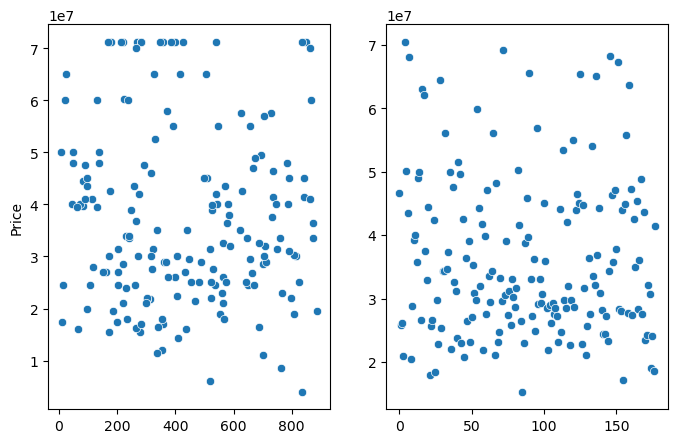

In [40]:
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
sns.scatterplot(y_test)
plt.subplot(1,2,2)
sns.scatterplot(y_pred)
plt.show()

# Imputing using KNN Imputer

In [42]:
knn = KNNImputer(n_neighbors= 3,weights='distance')
knn_impute = knn.fit_transform(final_df)
columns = knn.get_feature_names_out()
final_knn = pd.DataFrame(knn_impute,columns = columns)

In [76]:
final_knn.columns

Index(['Bedroom', 'Bathroom', 'Living', 'Parking_sqft', 'Road_size_ft',
       'Land_sqft', 'Price', 'District_Kathmandu', 'District_Lalitpur',
       'VDC_Asan', 'VDC_Baneshwor', 'VDC_Bhaisepati', 'VDC_Bhangal',
       'VDC_Budanilkantha', 'VDC_Dhapakhel', 'VDC_Gothatar', 'VDC_Harisiddhi',
       'VDC_Hattigauda', 'VDC_Hattisar', 'VDC_Imadol', 'VDC_Kapan',
       'VDC_Koteshwor', 'VDC_Lubhu', 'VDC_Pepsicola', 'VDC_Shital Height',
       'VDC_Tikathali', 'VDC_other', 'Direction_East', 'Direction_North',
       'Direction_North East', 'Direction_North West',
       'Direction_Select Direction', 'Direction_South', 'Direction_South East',
       'Direction_South West', 'Direction_West'],
      dtype='object')

In [132]:
ct = final_knn.corr(numeric_only = True)

<Axes: >

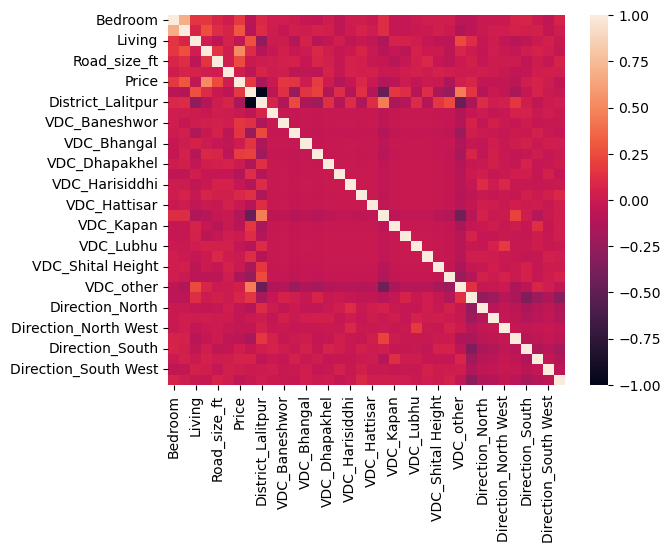

In [134]:
sns.heatmap(ct)

In [102]:
x = final_knn.drop(columns = ['Price'])
y = final_knn['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 87)

In [104]:
x.columns

Index(['Bedroom', 'Bathroom', 'Living', 'Parking_sqft', 'Road_size_ft',
       'Land_sqft', 'District_Kathmandu', 'District_Lalitpur', 'VDC_Asan',
       'VDC_Baneshwor', 'VDC_Bhaisepati', 'VDC_Bhangal', 'VDC_Budanilkantha',
       'VDC_Dhapakhel', 'VDC_Gothatar', 'VDC_Harisiddhi', 'VDC_Hattigauda',
       'VDC_Hattisar', 'VDC_Imadol', 'VDC_Kapan', 'VDC_Koteshwor', 'VDC_Lubhu',
       'VDC_Pepsicola', 'VDC_Shital Height', 'VDC_Tikathali', 'VDC_other',
       'Direction_East', 'Direction_North', 'Direction_North East',
       'Direction_North West', 'Direction_Select Direction', 'Direction_South',
       'Direction_South East', 'Direction_South West', 'Direction_West'],
      dtype='object')

In [106]:
transformer = ColumnTransformer([
    ('scale', StandardScaler(),['Bedroom', 'Bathroom', 'Living', 'Parking_sqft', 'Road_size_ft', 'Land_sqft'])
],remainder = 'passthrough')
lr = LinearRegression()

In [108]:
pipe = Pipeline([
    ('scaler',transformer),
    ('model', lr)
])

In [110]:
pipe.fit(x_train,y_train)

C:\Users\Samundra\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['Bedroom', 'Bathroom',
                                                   'Living', 'Parking_sqft',
                                                   'Road_size_ft',
                                                   'Land_sqft'])])),
                ('model', LinearRegression())])

In [112]:
y_pred = pipe.predict(x_test)

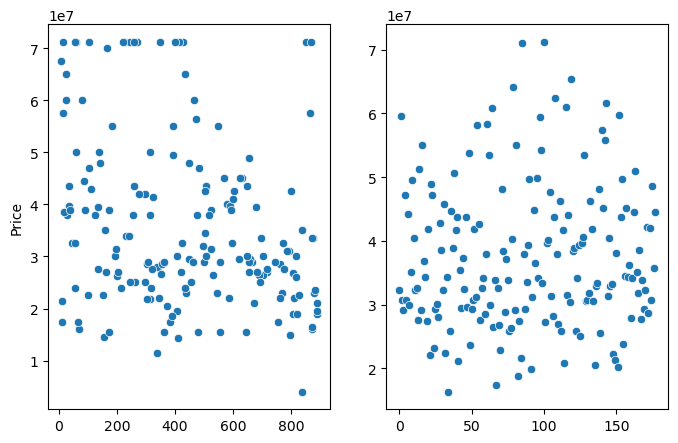

In [114]:
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
sns.scatterplot(y_test)
plt.subplot(1,2,2)
sns.scatterplot(y_pred)
plt.show()

In [116]:
r2 = r2_score(y_test,y_pred)

In [118]:
r2

0.5501319125172837

In [ ]:
# lisst = []
# for i in range(0,1000):
#     x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = i)
#     transformer = ColumnTransformer([
#     ('scale', StandardScaler(),['Bedroom', 'Bathroom', 'Living', 'Parking_sqft', 'Road_size_ft', 'Land_sqft'])],remainder = 'passthrough')
    
#     lr = LinearRegression()
    
#     pipe = Pipeline([
#     ('scaler',transformer),
#     ('model', lr)])

#     pipe.fit(x_train,y_train)
#     y_pred = pipe.predict(x_test)
#     result = r2_score(y_test,y_pred)
#     lisst.append(result)

In [ ]:
# np.argmax(lisst)

In [ ]:
# lisst[np.argmax(lisst)]

In [120]:
r2_adj = 1 - (((1-r2)*(x_test.shape[0] - 1))/(x_test.shape[0] - 1 - x_test.shape[1]))

In [122]:
x_test.shape[0]

178

In [124]:
r2_adj

0.4392489332081635